## Part 1

In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from palmerpenguins import load_penguins
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error
import plotnine as pt
from sklearn.compose import ColumnTransformer

In [3]:
insurance = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
insurance.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [4]:
#Standardizing and dummifying potential predictor variables
insurance.dropna(inplace=True)

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","smoker","region"]),
    ("standardize", StandardScaler(), ["age",  "bmi"])
  ],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

insurance.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [5]:
insurance.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


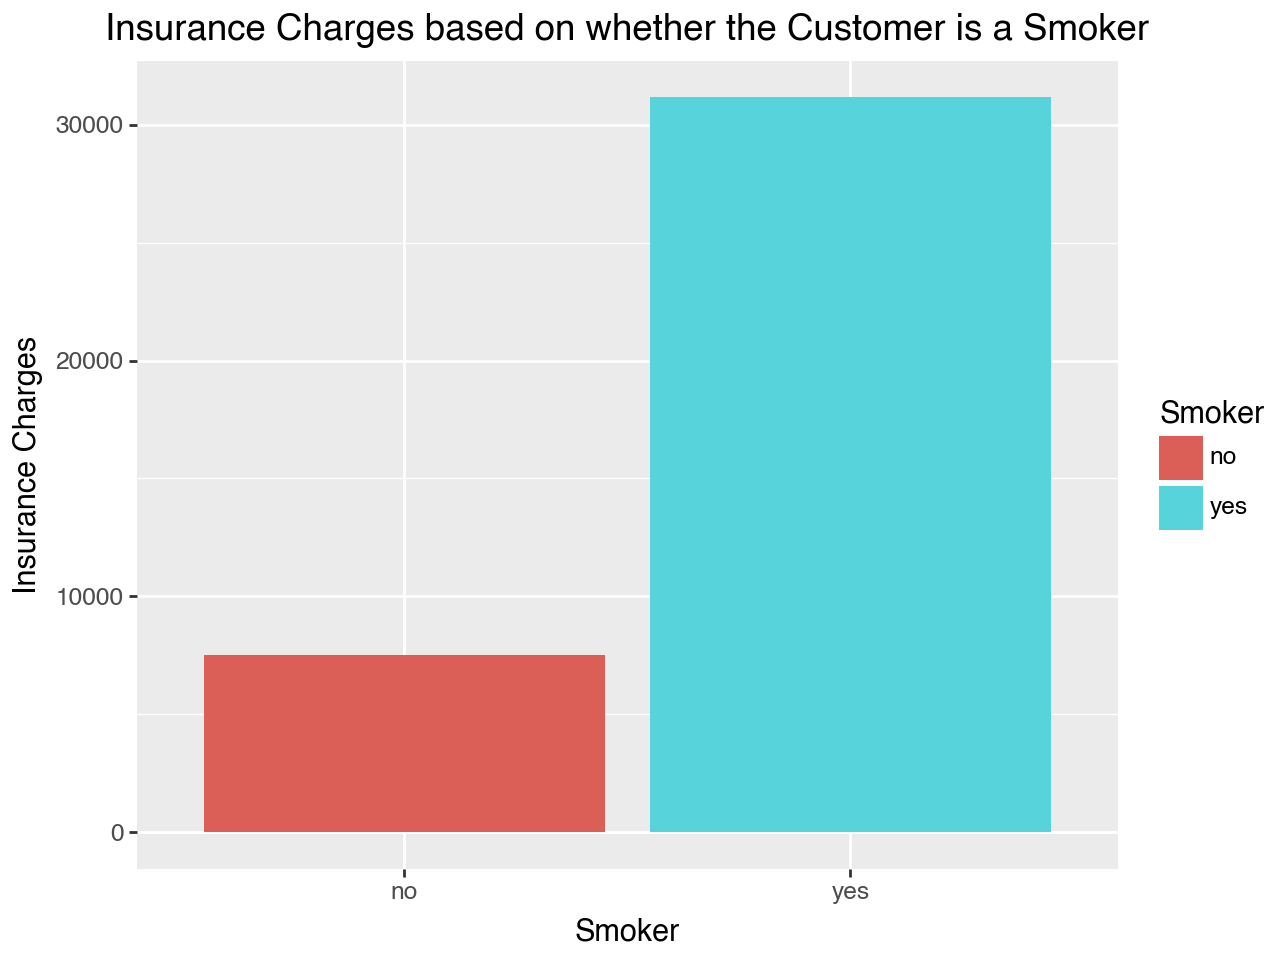

In [6]:
insurance2 = insurance.groupby("smoker")[["charges"]].mean().reset_index()

(pt.ggplot(insurance2, pt.aes(x = 'smoker', y = "charges",fill = "smoker"))
 + pt.geom_col()
 + pt.labs(title = "Insurance Charges based on whether the Customer is a Smoker",
           x = "Smoker",
           y = "Insurance Charges",
           fill = "Smoker"))

Here, we can see that smokers tend to have way higher insurance charges than non-smokers. From the graph, we can see that smokers have more than 3 times more charges than non-smokers. This is unlikely to be a coincidence as we know smoking is bad for your health.

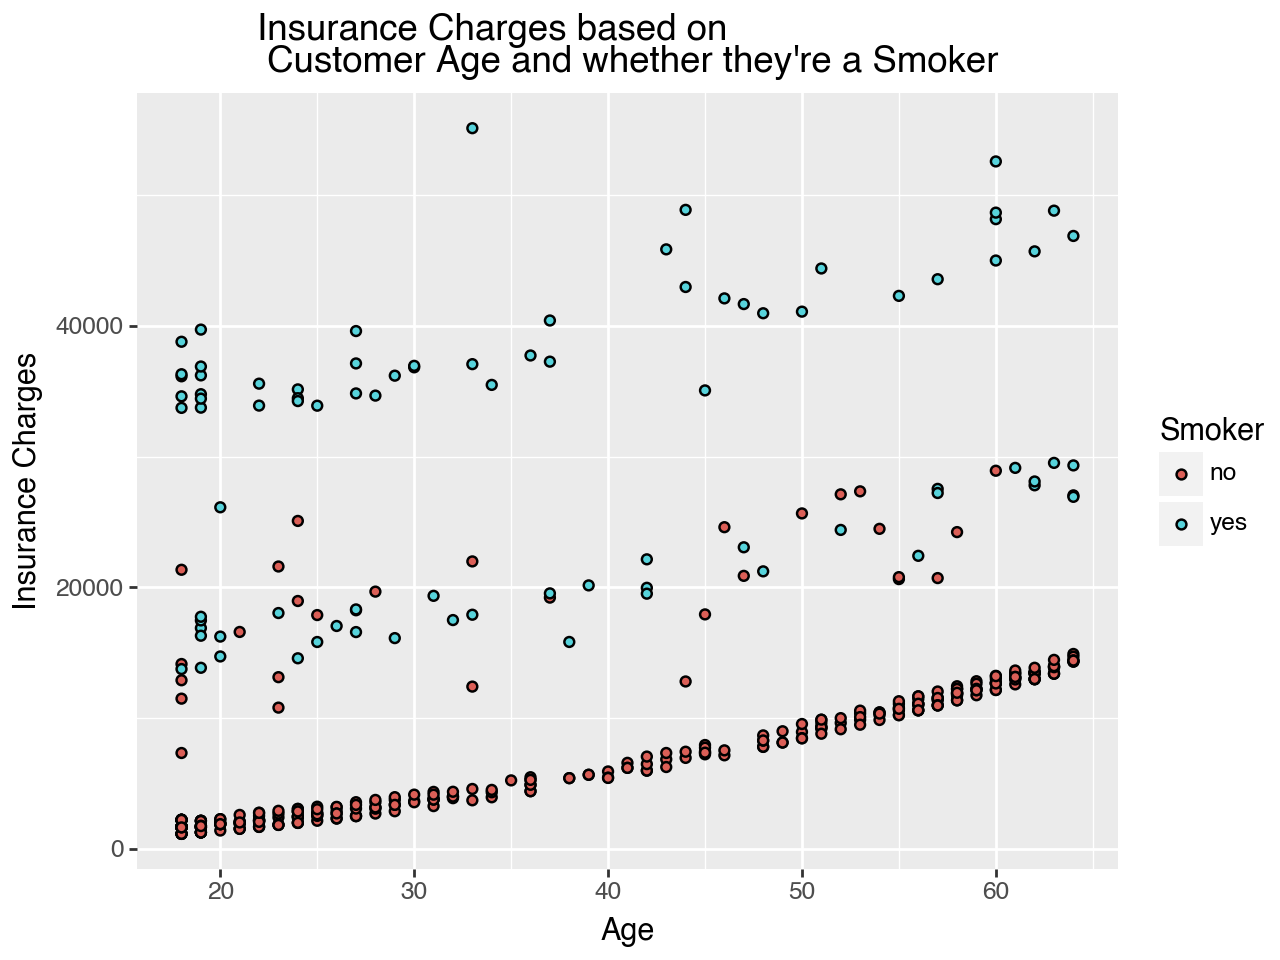

In [7]:
(pt.ggplot(insurance, pt.aes(x = 'age', y = "charges", fill = "smoker"))
 + pt.geom_point()
 + pt.labs(title = "Insurance Charges based on \n Customer Age and whether they're a Smoker",
           x = "Age",
           y = "Insurance Charges",
           fill = "Smoker"))

Here, we can see that generally, older people tend to have higher insurance charges than younger people. This is because health conditions are more common in older populations and everyone ends up having a health struggle at some point.

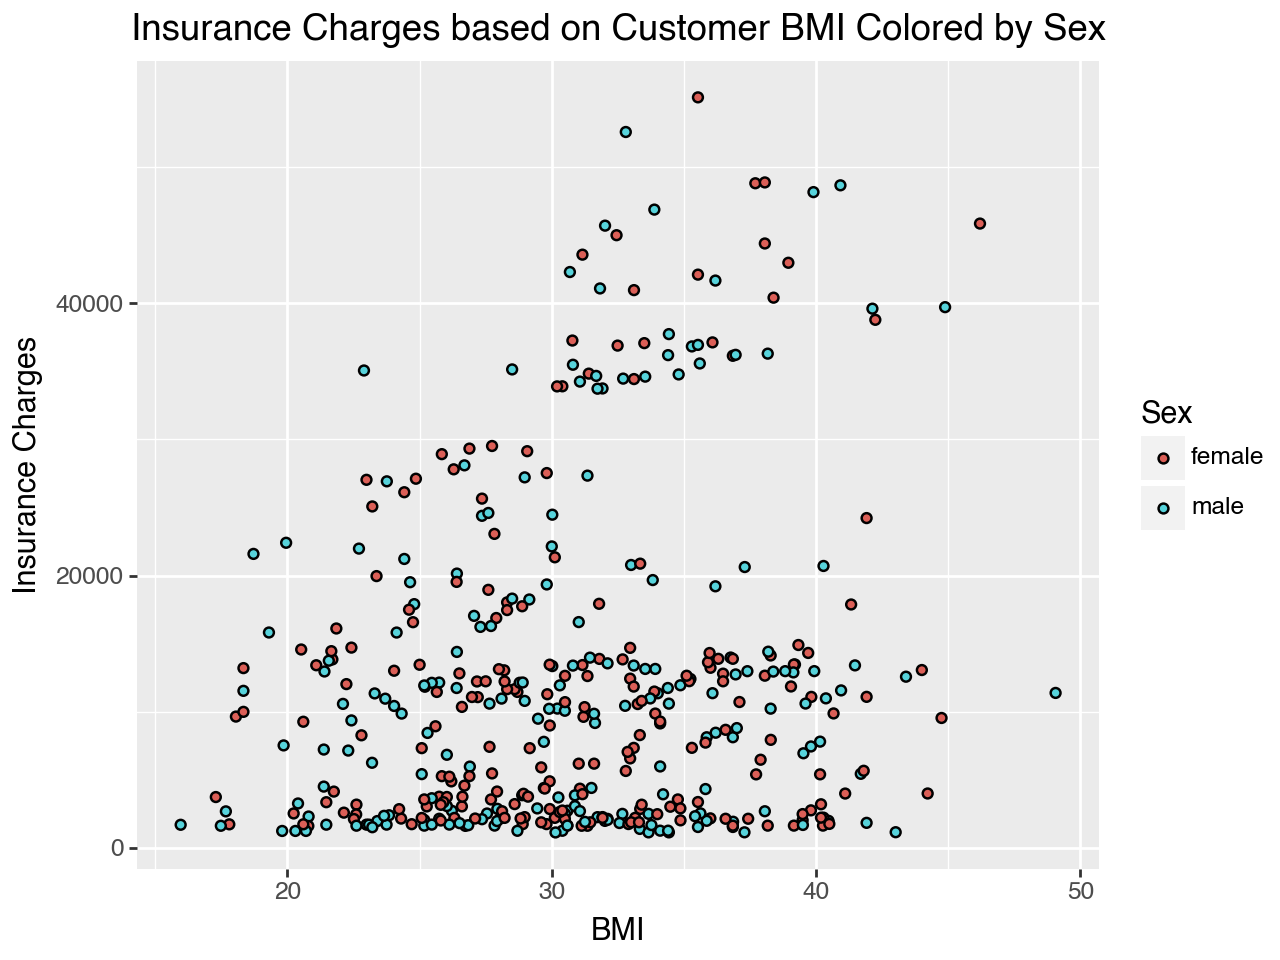

In [8]:
(pt.ggplot(insurance, pt.aes(x = 'bmi', y = "charges", fill = 'sex'))
 + pt.geom_point()
 + pt.labs(title = "Insurance Charges based on Customer BMI Colored by Sex",
           x = "BMI",
           y = "Insurance Charges",
           fill = "Sex"))

Here, we can see a weak positive correlation between BMI and Insurance Charges. People with a higher BMI tend to have more insurance charges. This is likely due to health conditions caused by overweight lifestyles.

## Part 2: Simple Linear Models

In [64]:
import sklearn as sk
# Linear Model
ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

X = insurance[['age']]
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_fitted = lr_pipeline.fit(X_train, y_train)

coefficients = lr_fitted.named_steps['linear_regression'].coef_
intercept = lr_fitted.named_steps['linear_regression'].intercept_

# Predictions for train and test sets
y_train_pred = lr_fitted.predict(X_train)
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
r1 = r2_score(y_test, y_test_pred)
test_mse = sk.metrics.mean_squared_error(y_test, y_test_pred)

print("R_Squared:", r1)
print("MSE:", test_mse)
print("Slope:", coefficients)
print("Intercept:", intercept)

R_Squared: 0.029817990731336064
MSE: 163289711.93182585
Slope: [4023.46259523]
Intercept: 11968.31237296904


Here, we can see a slope value of 3,738 and a intercept of around 12,000. This means a newborn baby is expected to have around $12,229 of insurance charges, and for every year increase of age, the insurance charges are expected to increase by about $3,738. Our R-Squared value is around 0.1 which means there is a very weak positive relationship between age and insurance charges, and the model is not a great fit.

In [58]:
import sklearn as sk
# Linear Model with Sex added
ct2 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"]),
    ("dummify", OneHotEncoder(sparse_output = False), ["sex"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct2),
  ("linear_regression", LinearRegression())]
)

X = insurance[['age','sex']]
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_fitted = lr_pipeline.fit(X_train, y_train)

intercept2 = lr_fitted.named_steps['linear_regression'].intercept_
coefficients2 = lr_fitted.named_steps['linear_regression'].coef_

# Predictions for train and test sets
y_train_pred = lr_fitted.predict(X_train)
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
r2 = r2_score(y_test, y_test_pred)
test_mse2 = sk.metrics.mean_squared_error(y_test, y_test_pred)


print("R_Squared:", r2)
print("MSE:", test_mse2)
print("Slope:", coefficients2)
print("Intercept:", intercept2)

R_Squared: 0.08177886580685345
MSE: 129032041.949788
Slope: [3747.6713191  -739.02306978  739.02306978]
Intercept: 12335.23372224859


This model has a intercept of about $12,300. For every year increase in age, the insurance charges are expected to increase by $3,747, and being male causes is associated with about $1,500 more insurance charges than females. The R-Squared value is still quite low with a value of 0.08, and we have a very high MSE.

In [47]:
import sklearn as sk
# Linear Model with Smoker added
ct3 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"]),
    ("dummify", OneHotEncoder(), ["smoker"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct3),
  ("linear_regression", LinearRegression())]
)

X = insurance[['age','smoker']]
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_fitted = lr_pipeline.fit(X_train, y_train)



# Predictions for train and test sets
y_train_pred = lr_fitted.predict(X_train)
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
r3 = r2_score(y_test, y_test_pred)
test_mse3 = sk.metrics.mean_squared_error(y_test, y_test_pred)
intercept3 = lr_fitted.named_steps['linear_regression'].intercept_
coefficients3 = lr_fitted.named_steps['linear_regression'].coef_


print("R_Squared:", r3)
print("MSE:", test_mse3)
print("Slope:", coefficients3)
print("Intercept:", intercept3)

R_Squared: 0.7713866786927629
MSE: 23491910.895321324
Slope: [  4157.38645785 -11984.19826918  11984.19826918]
Intercept: 19761.95875057073


This model has a higher intercept at around $19,700. For every year increase in age, the insurance charges are expected to increase by about $4,100. Being a smoker is associated with about $12,000 more insurance charges than baseline, while not smoking is associated with about -$12,000 insurance charges. This means that smoking is correlated with about $24,000 more in insurance charges. The R-Squared value is much higher for this model at about 0.77, and it has a smaller MSE than the model with age and sex as predictors. 

# 4
Model 3 with age and smoker as predictors was a much better fit for our data than Model 2 with age and sex as predictors. This can be seen with a much higher R-Squared value and a much lower MSE. This tells us that smoking is a far better indicator for insurance charges than sex is, even though sex may still be correlated with higher or lower insurance charges.

## Part 3: Multiple Linear Models

In [93]:
# Model with Age and BMI as Predictors
import sklearn as sk

# Linear Model with Smoker added
ct4 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct4),
  ("linear_regression", LinearRegression())]
)

X = insurance[['age','bmi']]
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_fitted = lr_pipeline.fit(X_train, y_train)



# Predictions for train and test sets
y_train_pred = lr_fitted.predict(X_train)
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
r4 = r2_score(y_test, y_test_pred)
test_mse4 = sk.metrics.mean_squared_error(y_test, y_test_pred)
intercept4 = lr_fitted.named_steps['linear_regression'].intercept_
coefficients4 = lr_fitted.named_steps['linear_regression'].coef_


print("R_Squared:", r4)
print("MSE:", test_mse4)
print("Slope:", coefficients4)
print("Intercept:", intercept4)

R_Squared: 0.144341189413272
MSE: 138813237.98739198
Slope: [3462.77894658  906.41304872]
Intercept: 12378.57888560062


The MSE is smaller than the model in Part 2 Q1, and the R-Squared is larger than the one in the original model. This means that more of the variation is explained by this model because it has another predictor variable that can help explain the shape of the data.

In [ ]:
# Model with Age and Age Square as Predictors
import sklearn as sk

insurance['age_square'] = insurance['age']**2
# Quadratic Model with Age Squared added
ct5 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "age_square"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct5),
  ("linear_regression", LinearRegression())]
)

X = insurance[['age','age_square']]
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_fitted = lr_pipeline.fit(X_train, y_train)



# Predictions for train and test sets
y_train_pred = lr_fitted.predict(X_train)
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
r5 = r2_score(y_test, y_test_pred)
test_mse5 = sk.metrics.mean_squared_error(y_test, y_test_pred)
intercept5 = lr_fitted.named_steps['linear_regression'].intercept_
coefficients5 = lr_fitted.named_steps['linear_regression'].coef_


print("R_Squared:", r5)
print("MSE:", test_mse5)
print("Slope:", coefficients5)
print("Intercept:", intercept5)

R_Squared: 0.06161666853319436
MSE: 147683406.8996533
Slope: [ 6606.02415494 -2723.86981556]
Intercept: 12280.920777244584


Since we are using more variables here than before, our model is a better fit. We have a larger R-Squared value and a lower MSE value than the original model in Part 2 Q1, so this model is a better fit.

In [97]:
# Model with Degree 4 from Ages as Predictors
import sklearn as sk
# Degree 4 Model for Age
ct6 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)


deg4_pipeline = Pipeline(
  [("preprocessing", ct6),
  ('polynomial_features', PolynomialFeatures(degree=4, include_bias=False)),
  ("linear_regression", LinearRegression())]
)

X = insurance[['age']]
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y)

deg4_fitted = deg4_pipeline.fit(X_train, y_train)



# Predictions for train and test sets
y_train_pred = deg4_fitted.predict(X_train)
y_test_pred = deg4_fitted.predict(X_test)


# Calculate MSE for training and testing data
r6 = r2_score(y_test, y_test_pred)
test_mse6 = sk.metrics.mean_squared_error(y_test, y_test_pred)
intercept6 = lr_fitted.named_steps['linear_regression'].intercept_
coefficients6 = lr_fitted.named_steps['linear_regression'].coef_


print("R_Squared:", r6)
print("MSE:", test_mse6)
print("Slope:", coefficients6)
print("Intercept:", intercept6)

R_Squared: 0.09037099481457267
MSE: 158493870.96699083
Slope: [3462.77894658  906.41304872]
Intercept: 12378.57888560062


This model is the degree 4 model to predict insurance models from age. Once again, we have a higher R-Squared value and a lower MSE value than the original model in Part 2 Q1. This means this degree 4 model was a better fit than the simple linear model.

In [ ]:
# Model with Degree 12 from Ages as Predictors
import sklearn as sk
# Degree 12 Model for Age
ct7 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)


deg12_pipeline = Pipeline(
  [("preprocessing", ct7),
  ('polynomial_features', PolynomialFeatures(degree=12, include_bias=False)),
  ("linear_regression", LinearRegression())]
)

X = insurance[['age']]
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y)

deg12_fitted = deg12_pipeline.fit(X_train, y_train)



# Predictions for train and test sets
y_train_pred = deg12_fitted.predict(X_train)
y_test_pred = deg12_fitted.predict(X_test)


# Calculate MSE for training and testing data
r7 = r2_score(y_test, y_test_pred)
test_mse7 = sk.metrics.mean_squared_error(y_test, y_test_pred)
intercept7 = lr_fitted.named_steps['linear_regression'].intercept_
coefficients7 = lr_fitted.named_steps['linear_regression'].coef_


print("R_Squared:", r7)
print("MSE:", test_mse7)
print("Slope:", coefficients7)
print("Intercept:", intercept7)

R_Squared: 0.07860538111792548
MSE: 116513356.98997009
Slope: [ 6606.02415494 -2723.86981556]
Intercept: 12280.920777244584


This model is the degree 12 model to predict insurance models from age. We have a higher R-Squared value and a lower MSE value than the original model in Part 2 Q1. This means this degree 12 model was a better fit than the simple linear model.

# 5
According to the R-Squared value and MSE, the model with Age and BMI as predictors was the best model. It had the highest R-Squared and the lowest MSE, so it is the best model. I would agree with the analysis because it's the only model that uses multiple predictor variables. Additionally, intuition would say that there is a positive correlation between BMI and insurance charges because heavier people tend to have more health issues. Still, there are almost certainly better models out there because the R-Squared value of 0.14 for this model is still quite low.

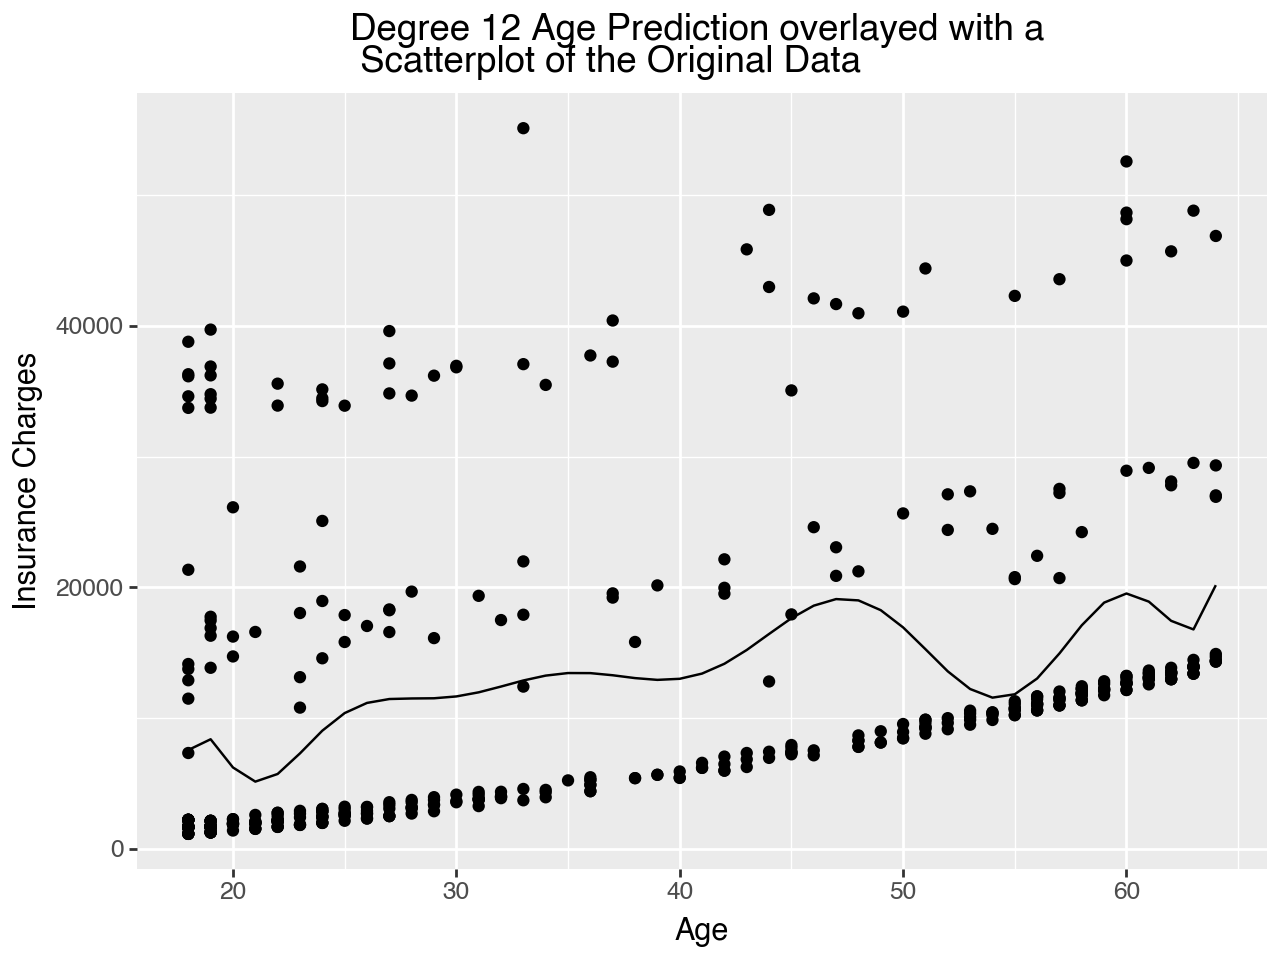

In [110]:
age_data = insurance[['age']]
insurance['Degree 12'] = deg12_fitted.predict(age_data)

(pt.ggplot(insurance, pt.aes(x='age'))
 + pt.geom_point(pt.aes(y = 'charges'))
 + pt.geom_line(pt.aes(y = 'Degree 12'))
 + pt.labs(title = "Degree 12 Age Prediction overlayed with a \n Scatterplot of the Original Data",
           x = "Age",
           y = "Insurance Charges")
)

From an initial glance, it looks like the degree 12 model might have overfit this data because it appears to be moving too much with the data which could give us inaccurate predictions.